In [85]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
data= np.loadtxt('./fake_noise_04_raw.txt',delimiter=',')#generated data with Kalman filter

print(data.shape)

(3072, 3072)


In [87]:
seq=[400] #starting series

In [88]:
#Calculates the distance between two series. Given series A, B returns the Euclidean distance between A and B
def distance(a, b):
    return np.sqrt(np.sum((a - b)**2))
    
#The probability is converted according to the sorted distances, which adds up to 1
def distopro(a):
    a=len(a)
    if(a==3):
        b=[0.2,0.3,0.5]
    elif(a==4):
        b=[0.1,0.2,0.3,0.4]
    else:
        b=[0.04,0.12,0.2,0.28,0.36]
    return np.array(b)
        

#Input is the original data matrix, return is the relationship matrix relation_matrix, and probability matrix probability_matrix
#Data is the matrix of series, the first dimension is the number of series, and the second dimension is each series
#Window_size is the size of the window to calculate the distance, and k is the number of the nearest neighbors selected. Currently, 3,4,5 are supported
def transform(data, window_size, k):
    numOfSeq=data.shape[0]
    distance_matrix=np.ones([numOfSeq,numOfSeq],dtype = float)
    for i in range(numOfSeq):
        for j in range(numOfSeq):
            distance_matrix[i][j]=distance(data[i,data.shape[1]-window_size:],data[j,0:window_size])
    relation_matrix=np.ones([numOfSeq,k],dtype = int)
    subdistance_matrix=np.ones([numOfSeq,k],dtype = float)
    probability_matrix=np.ones([numOfSeq,k],dtype = float)
    for i in range(numOfSeq):
        relation_matrix[i]=distance_matrix[i].argsort()[::-1][data.shape[1]-k:]
        #print(relation_matrix[i])
    for i in range(numOfSeq):
        for j in range(k):
            subdistance_matrix[i][j]=distance_matrix[i][relation_matrix[i][j]]
    
    for i in range(numOfSeq):
        probability_matrix[i]=distopro(subdistance_matrix[i])
    
    
    return distance_matrix, subdistance_matrix ,relation_matrix, probability_matrix
            
#print(transform(np.array([[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]), 2, 3))


#Given the ID of the current series, the ID of the next series is generated randomly according to probability
def next_step(relation_array, probability_array):
    value=random.random()
    print(value)
    threshold=[0]
    sum_value=0
    for i in range(len(probability_array)):
        sum_value=sum_value+probability_array[i]
        threshold.append(sum_value)
    for i in range(len(threshold)-1):
        if(value>threshold[i] and value<=threshold[i+1]):
            return relation_array[i]

#Given a relation matrix and a probability matrix, returns a series of length        
def random_walk(relation_matrix, probability_matrix, length):
    #seq=[0]
    temp_id=0
    for i in range(length-1):
        temp_id=next_step(relation_matrix[temp_id],probability_matrix[temp_id])
        seq.append(temp_id)
        #print(temp_id)
    return np.array(seq)

a,b,c,d=transform(data, 100, 5)

print(random_walk( c, d, 10))

0.42388705100298174
0.9030260808403108
0.8752216806739933
0.20746201631744332
0.5050087692120705
0.083047895032073
0.48599883260508225
0.8416476286990989
0.7891558340413488
[ 400  297 2457 3031  547 2502 1159  460 1872  263]


In [93]:
import numpy as np

def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

#data是一个二维数组，每一维表示一个拼接的片段，size为拟合窗口的长度
def contact(data, size):
    result=[]
    result=np.array(result)
    colomns=data.shape[1]
    for i in range(data.shape[0]):
        if(i==0):
            result=np.append(result, data[i][0:colomns-size])
        elif(i>0 and i <data.shape[0]-2):
            result=np.append(result, data[i][size:colomns-size])
        else:
            result=np.append(result, data[i][size:])
            break
        for j in range(size):
            temp=(1-sigmoid(j))*data[i][colomns-size+j]+sigmoid(j)*data[i+1][j]
            #print(1-sigmoid(j))
            result=np.append(result, temp)
        #print('i:',i,result)
    plt.figure(figsize=(60, 8))
    plt.plot(result,color='blue')
    plt.xlim(0,26848)
    #plt.xticks([])
    #plt.yticks([])
    plt.savefig('./fake_04.pdf',dpi=600,
            bbox_inches = 'tight')
    np.savetxt("./fake_04.txt", result, fmt='%f',delimiter=',')
    return len(result)

In [94]:
data_con=[]
for i in range(10):
    index=seq[i]
    data_con.append(data[index])

In [95]:
data_con=np.array(data_con)

26848


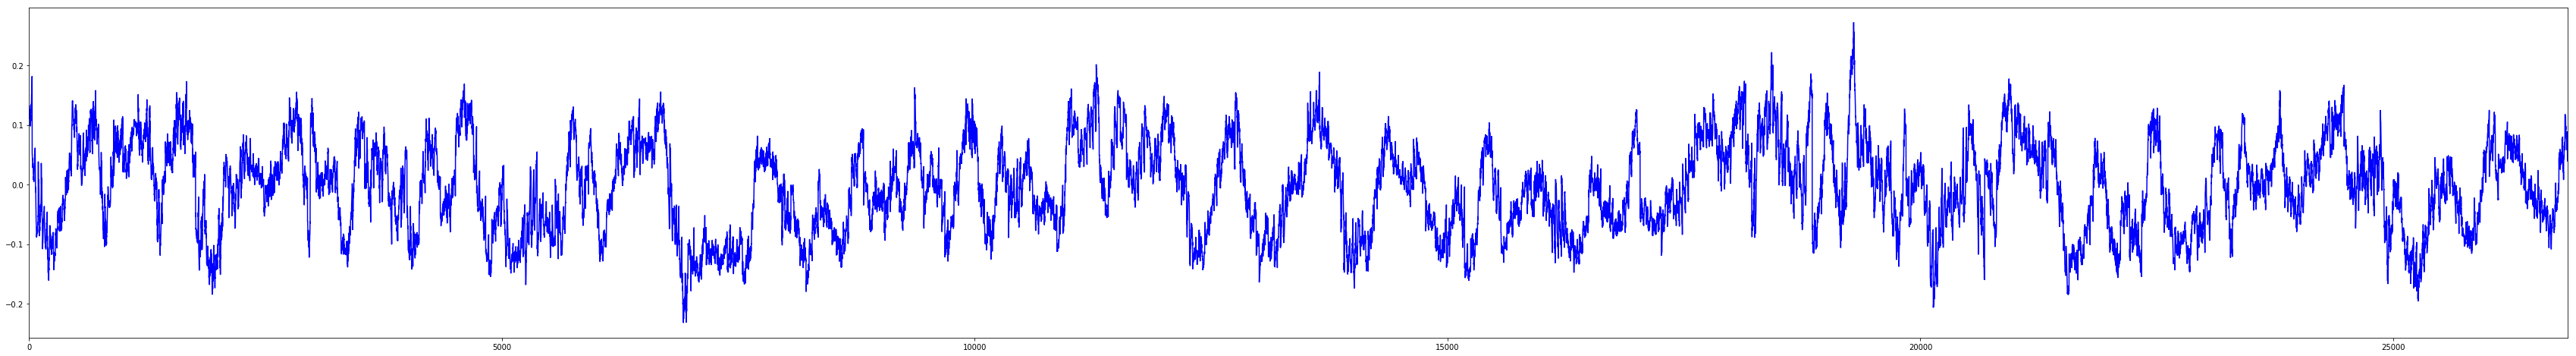

In [96]:
#data=np.array([[1,2,3,4,5,6],[1,1,4,3,7,8]])
print(contact(data_con,100))

In [325]:
c=[]
for i in range(10):
    index=seq[i]
    data0=data[index].tolist()
    c+=data0

In [46]:
len(c)

30720

In [47]:
np.savetxt("pin4_19.txt", c, fmt='%f',delimiter=',')

In [59]:
datas = pd.read_csv("14_data.csv",header=None)#real data

In [97]:
data4=datas[4]
data4=data4.tolist()

In [98]:
a=data4[400*50:400*50+26848]

In [99]:
len(a)

26848

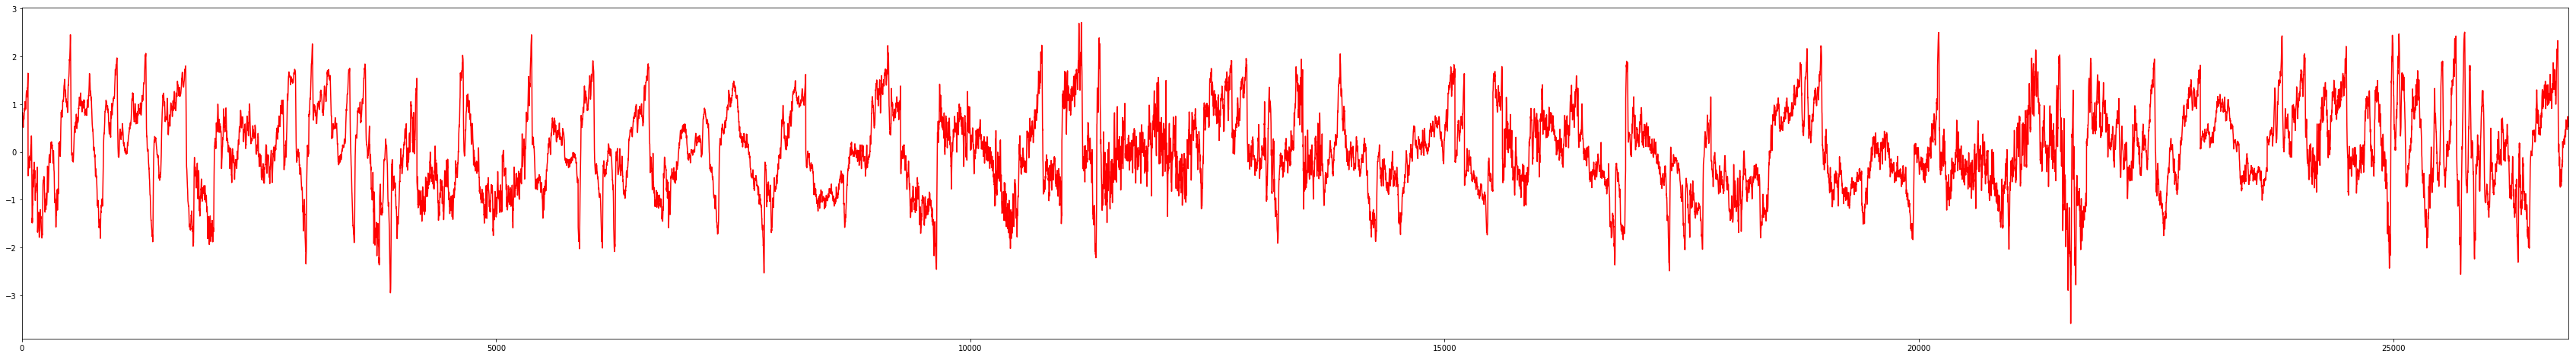

In [100]:
plt.figure(figsize=(60, 8))
plt.plot(a,color='red')
plt.xlim(0,26848)
plt.savefig('real_04.pdf',dpi=600,
            bbox_inches = 'tight')